In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#from library.sb_utils import save_file

ModuleNotFoundError: No module named 'library'

In [2]:
ski_data = pd.read_csv(r'C:\Users\Martin\Desktop\casa\ski_data_cleaned.csv')
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non

In [3]:
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,2.0,1.0,1610.0,113.0,150.0,60,669.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,1.0,2.0,640.0,60.0,45.0,44,350.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,1.0,1.0,30.0,30.0,150.0,36,69.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,4.0,2.0,777.0,104.0,122.0,81,260.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,2.0,1.2,800.0,80.0,115.0,49,250.0,78.0,104.0,80.0


In [4]:
state_summary = pd.read_csv(r'C:\Users\Martin\Desktop\casa\state_summary.csv')
state_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        35 non-null     object 
 1   Population                   35 non-null     int64  
 2   resorts_per_state            35 non-null     int64  
 3   state_total_skiable_area_ac  35 non-null     int64  
 4   state_total_days_open        35 non-null     int64  
 5   state_total_terrain_parks    35 non-null     int64  
 6   state_total_nightskiing_ac   35 non-null     int64  
 7   state_area_sq_miles          35 non-null     float64
dtypes: float64(1), int64(6), object(1)
memory usage: 2.3+ KB


In [5]:
state_summary.head()

,state,Population,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_area_sq_miles
0,Alaska,724357,3,2280,345,2280,580,665384.04
1,Arizona,7520103,2,1577,237,1577,80,113990.30
2,California,39613493,21,25948,2738,25948,587,163694.74
3,Colorado,5893634,22,43682,3258,43682,428,104093.67
4,Connecticut,3552821,5,358,353,358,256,5543.41


In [6]:
#state wide market *state as index 
state_summary_newind = state_summary.set_index('state')
state_summary_newind.state_area_sq_miles.sort_values(ascending=False).head()

state
Alaska        665384.04
California    163694.74
Montana       147039.71
New Mexico    121590.30
Arizona       113990.30
Name: state_area_sq_miles, dtype: float64

In [7]:
state_summary_newind.Population.sort_values(ascending=False).head()

state
California      39613493
New York        19299981
Pennsylvania    12804123
Illinois        12569321
Ohio            11714618
Name: Population, dtype: int64

In [8]:
state_summary_newind.resorts_per_state.sort_values(ascending=False).head()

state
New York        33
Michigan        28
Colorado        22
California      21
Pennsylvania    19
Name: resorts_per_state, dtype: int64

In [9]:
state_summary_newind.state_total_skiable_area_ac.sort_values(ascending=False).head()

state
Colorado      43682
Utah          30508
California    25948
Montana       21410
Idaho         16396
Name: state_total_skiable_area_ac, dtype: int64

In [10]:
state_summary_newind.state_total_nightskiing_ac.sort_values(ascending=False).head()

state
New York        2836
Washington      1997
Michigan        1946
Pennsylvania    1528
Oregon          1127
Name: state_total_nightskiing_ac, dtype: int64

In [11]:
state_summary_newind.state_total_days_open.sort_values(ascending=False).head()

state
Colorado         3258
California       2738
Michigan         2389
New York         2384
New Hampshire    1847
Name: state_total_days_open, dtype: int64

In [13]:
#We have to create some rations so that we can see the relationship between resorts and area/population
state_summary['resorts_per_100kcapita'] = 100_000 * state_summary.resorts_per_state/state_summary.Population
state_summary['resorts_per_100ksq_mile'] = 100_000 * state_summary.resorts_per_state/state_summary.state_area_sq_miles
state_summary[['state','resorts_per_100ksq_mile']].sort_values(by='resorts_per_100ksq_mile', ascending=False).head()


,state,resorts_per_100ksq_mile
17,New Hampshire,171.138370
29,Vermont,155.984177
11,Massachusetts,104.222035
4,Connecticut,90.197189
25,Rhode Island,64.729528


In [14]:
state_summary[['state','resorts_per_100kcapita']].sort_values(by='resorts_per_100kcapita', ascending=False).head()

,state,resorts_per_100kcapita
29,Vermont,2.406735
34,Wyoming,1.376759
17,New Hampshire,1.166008
15,Montana,1.105987
9,Maine,0.664441


In [15]:
state_summary.columns

Index(['state', 'Population', 'resorts_per_state',
       'state_total_skiable_area_ac', 'state_total_days_open',
       'state_total_terrain_parks', 'state_total_nightskiing_ac',
       'state_area_sq_miles', 'resorts_per_100kcapita',
       'resorts_per_100ksq_mile'],
      dtype='object')

In [16]:
#drop the population and area columns because info contained within these two new columns
state_summary.drop(columns = ['Population','state_area_sq_miles'], inplace = True)

In [17]:
state_summary.columns

Index(['state', 'resorts_per_state', 'state_total_skiable_area_ac',
       'state_total_days_open', 'state_total_terrain_parks',
       'state_total_nightskiing_ac', 'resorts_per_100kcapita',
       'resorts_per_100ksq_mile'],
      dtype='object')

Text(0, 0.5, 'count')

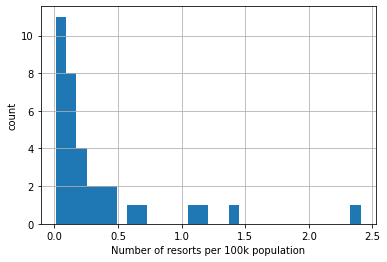

In [18]:
#visualize density of resorts based on population

state_summary.resorts_per_100kcapita.hist(bins=30)
plt.xlabel('Number of resorts per 100k population')
plt.ylabel('count')

Text(0, 0.5, 'count')

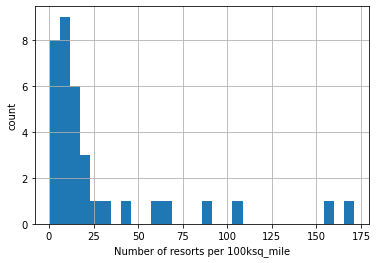

In [43]:
#visualize density of resorts based on area

state_summary.resorts_per_100ksq_mile.hist(bins=30)
plt.xlabel('Number of resorts per 100ksq_mile')
plt.ylabel('count')

In [19]:
#fixing the index 

state_summary_scale = state_summary.set_index('state')
#Create a new dataframe, `state_summary_scale` from `state_summary` whilst setting the index to 'state'
#Save the state labels (using the index attribute of `state_summary_scale`) into the variable 'state_summary_index'
state_summary_index = state_summary_scale.index
#Save the column names (using the `columns` attribute) of `state_summary_scale` into the variable 'state_summary_columns'
state_summary_columns = state_summary_scale.columns
state_summary_scale.head()

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
state,,,,,,,
Alaska,3,2280,345,2280,580,0.414160,0.450867
Arizona,2,1577,237,1577,80,0.026595,1.754535
California,21,25948,2738,25948,587,0.053012,12.828757
Colorado,22,43682,3258,43682,428,0.373284,21.134811
Connecticut,5,358,353,358,256,0.140733,90.197189


In [20]:
#Note, scale() returns an **ndarray** so you lose the column names.
#Because you want to visualise scaled data, you already copied the column names.
#Now you can construct a dataframe from the ndarray here and reintroduce the column names.

state_summary_scale = scale(state_summary_scale)


In [23]:
#the above is a ndarray so make into df 

#Create a new dataframe from `state_summary_scale` using the column names we saved in `state_summary_columns`
state_summary_scaled_df = pd.DataFrame(state_summary_scale, columns= state_summary_columns)
state_summary_scaled_df.head()

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,-0.806912,-0.392012,-0.689059,-0.392012,0.069410,0.154270,-0.690010
1,-0.933558,-0.462424,-0.819038,-0.462424,-0.701326,-0.643008,-0.658135
2,1.472706,1.978574,2.190933,1.978574,0.080201,-0.588664,-0.387369
3,1.599351,3.754811,2.816757,3.754811,-0.164893,0.070182,-0.184285
4,-0.553622,-0.584519,-0.679431,-0.584519,-0.430027,-0.408210,1.504298


In [24]:
#First of all, check the mean of the scaled features using panda's mean() DataFrame method.

state_summary_scaled_df.mean()

resorts_per_state             -6.344132e-17
state_total_skiable_area_ac   -5.432163e-17
state_total_days_open          9.754102e-17
state_total_terrain_parks     -5.432163e-17
state_total_nightskiing_ac     6.344132e-17
resorts_per_100kcapita        -1.776357e-16
resorts_per_100ksq_mile       -8.881784e-17
dtype: float64

In [25]:
#Well, this is a little embarrassing. The numbers should be closer to 1
state_summary_scaled_df.std()

resorts_per_state              1.014599
state_total_skiable_area_ac    1.014599
state_total_days_open          1.014599
state_total_terrain_parks      1.014599
state_total_nightskiing_ac     1.014599
resorts_per_100kcapita         1.014599
resorts_per_100ksq_mile        1.014599
dtype: float64

In [26]:
#The numbers should be closer to 1
state_summary_scaled_df.std(ddof=0)

resorts_per_state              1.0
state_total_skiable_area_ac    1.0
state_total_days_open          1.0
state_total_terrain_parks      1.0
state_total_nightskiing_ac     1.0
resorts_per_100kcapita         1.0
resorts_per_100ksq_mile        1.0
dtype: float64

In [27]:
state_pca = PCA().fit(state_summary_scale)

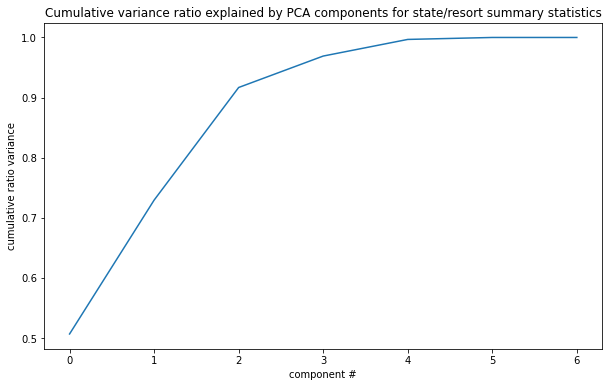

In [29]:
#The first two components seem to account for over 75% of the variance, and the first four for over 95%.

#Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of `state_pca` and
#create a line plot to visualize the cumulative explained variance ratio with number of components
#Set the xlabel to 'Component #', the ylabel to 'Cumulative ratio variance', and the
#title to 'Cumulative variance ratio explained by PCA components for state/resort summary statistics'
#Hint: remember the handy ';' at the end of the last plot call to suppress that untidy output
plt.subplots(figsize=(10, 6))
plt.plot(state_pca.explained_variance_ratio_.cumsum())
plt.xlabel('component #')
plt.ylabel('cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');

In [33]:
#Code task 7#
state_pca_x = state_pca.transform('state_summary_scale')

state_pca_x.shape




ValueError: Expected 2D array, got scalar array instead:
array=state_summary_scale.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
## **PCA** this can be done by subtracting the mean and dividing by the standard deviation
##for each value of each variable.
##Principal Component Analysis Standardization

Once the standardization is done, all the variables will be transformed to the same scale.
##ask about scale()
##ask about transform()
## what does ';' do at the end of plotting something

In [ ]:
#skipped a few steps after getting stuck above

#3.5.3.3 Average ticket price by state

In [35]:
#Code task 8#
#Calculate the average 'AdultWeekend' ticket price by state    **reminder: state names already in index
state_avg_price = ski_data.groupby('state')['AdultWeekend'].mean()
state_avg_price.head()

state
Alaska         57.333333
Arizona        83.500000
California     81.416667
Colorado       90.714286
Connecticut    56.800000
Name: AdultWeekend, dtype: float64

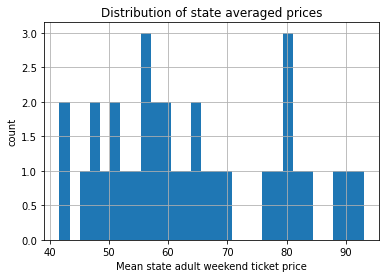

In [36]:
state_avg_price.hist(bins=30)
plt.title('Distribution of state averaged prices')
plt.xlabel('Mean state adult weekend ticket price')
plt.ylabel('count');

In [ ]:
##cannot continue without doing skipped step
## will continue but skip PCA part for the sake of time 

In [52]:
pca_df = pd.DataFrame(state_avg_price.copy())
type(pca_df)

pandas.core.frame.DataFrame

In [53]:
##create quartiles
pca_df['Quartile'] = pd.qcut(pca_df.AdultWeekend, q=4, precision=1)
pca_df.head()

,AdultWeekend,Quartile
state,,
Alaska,57.333333,"(53.1, 60.4]"
Arizona,83.500000,"(78.4, 93.0]"
California,81.416667,"(78.4, 93.0]"
Colorado,90.714286,"(78.4, 93.0]"
Connecticut,56.800000,"(53.1, 60.4]"


In [57]:
pca_df.dtypes

AdultWeekend     float64
Quartile        category
dtype: object

In [76]:
pca_df.sort_values(by = 'AdultWeekend',ascending=False)

,AdultWeekend,Quartile
state,,
Utah,93.000000,"(78.4, 93.0]"
Colorado,90.714286,"(78.4, 93.0]"
Vermont,87.900000,"(78.4, 93.0]"
Arizona,83.500000,"(78.4, 93.0]"
California,81.416667,"(78.4, 93.0]"
Nevada,81.000000,"(78.4, 93.0]"
New Jersey,79.990000,"(78.4, 93.0]"
West Virginia,79.750000,"(78.4, 93.0]"
Maryland,79.000000,"(78.4, 93.0]"


In [ ]:
##I'm missing rhode island 
##skipped more steps requiring PCA columns

In [60]:
pd.DataFrame(state_pca.components_, columns=state_summary_columns)

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,0.474663,0.425030,5.080296e-01,0.425030,3.090696e-01,1.962575e-01,1.458032e-01
1,0.132866,-0.340549,4.611532e-02,-0.340549,2.077375e-03,5.143520e-01,6.954931e-01
2,0.320173,-0.351081,8.750728e-02,-0.351081,6.553173e-01,-4.562967e-01,-7.528558e-02
3,0.050415,-0.114181,-1.148070e-01,-0.114181,2.804115e-01,6.955743e-01,-6.290859e-01
4,-0.368196,0.248248,-5.415049e-01,0.248248,5.926525e-01,5.647567e-02,3.058172e-01
5,-0.718625,-0.073847,6.524673e-01,-0.073847,2.125166e-01,4.129526e-02,-9.470418e-03
6,0.000000,-0.707107,7.319261e-18,0.707107,-6.750346e-18,-5.866087e-17,1.311755e-16


In [61]:
state_summary[state_summary.state.isin(['New Hampshire', 'Vermont'])].T

,17,29
state,New Hampshire,Vermont
resorts_per_state,16,15
state_total_skiable_area_ac,3427,7239
state_total_days_open,1847,1777
state_total_terrain_parks,3427,7239
state_total_nightskiing_ac,376,50
resorts_per_100kcapita,1.16601,2.40674
resorts_per_100ksq_mile,171.138,155.984


In [62]:
#both states have particularly large values of resorts_per_100ksq_mile
#in absolute terms, and these put them more than 3 standard deviations from the mean.
#Vermont also has a notably large value for resorts_per_100kcapita. 
state_summary_scaled_df[state_summary.state.isin(['New Hampshire', 'Vermont'])].T

,17,29
resorts_per_state,0.839478,0.712833
state_total_skiable_area_ac,-0.277128,0.104681
state_total_days_open,1.118608,1.034363
state_total_terrain_parks,-0.277128,0.104681
state_total_nightskiing_ac,-0.245050,-0.747570
resorts_per_100kcapita,1.700931,4.253288
resorts_per_100ksq_mile,3.483320,3.112798


In [63]:
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


In [64]:
#merge the two datasets and engineer some intuitive features.
#For example, you can engineer a resort's share of the supply for a given state.

state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,2280,345,2280,580,0.414160,0.450867
1,Arizona,2,1577,237,1577,80,0.026595,1.754535
2,California,21,25948,2738,25948,587,0.053012,12.828757
3,Colorado,22,43682,3258,43682,428,0.373284,21.134811
4,Connecticut,5,358,353,358,256,0.140733,90.197189


In [65]:
# DataFrame's merge method provides SQL-like joins
# here 'state' is a column (not an index)
ski_data = ski_data.merge(state_summary, how='left', on='state')
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


In [67]:
#Having merged your state summary features into the ski resort data, add "state resort competition" features:

 #   ratio of resort skiable area to total state skiable area
  #  ratio of resort days open to total state days open
   # ratio of resort terrain park count to total state terrain park count
    #ratio of resort night skiing area to total state night skiing area

#Once you've derived these features to put each resort within the context of its state,drop those state columns. Their main purpose was to understand what share of states' skiing "assets" is accounted for by each resort.
ski_data['resort_skiable_area_ac_state_ratio'] = ski_data.SkiableTerrain_ac / ski_data.state_total_skiable_area_ac
ski_data['resort_days_open_state_ratio'] = ski_data.daysOpenLastYear / ski_data.state_total_days_open
ski_data['resort_terrain_park_state_ratio'] = ski_data.TerrainParks / ski_data.state_total_terrain_parks
ski_data['resort_night_skiing_state_ratio'] = ski_data.NightSkiing_ac / ski_data.state_total_nightskiing_ac
ski_data.head()
#ski_data.drop(columns=['state_total_skiable_area_ac', 'state_total_days_open', 
                      # 'state_total_terrain_parks', 'state_total_nightskiing_ac'], inplace=True)

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile,resort_skiable_area_ac_state_ratio,resort_days_open_state_ratio,resort_terrain_park_state_ratio,resort_night_skiing_state_ratio
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,2280,345,2280,580,0.414160,0.450867,0.706140,0.434783,0.000877,0.948276
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,2280,345,2280,580,0.414160,0.450867,0.280702,0.130435,0.000439,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,2280,345,2280,580,0.414160,0.450867,0.013158,0.434783,0.000439,0.051724
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,1577,237,1577,80,0.026595,1.754535,0.492708,0.514768,0.002536,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,1577,237,1577,80,0.026595,1.754535,0.507292,0.485232,0.001268,1.000000


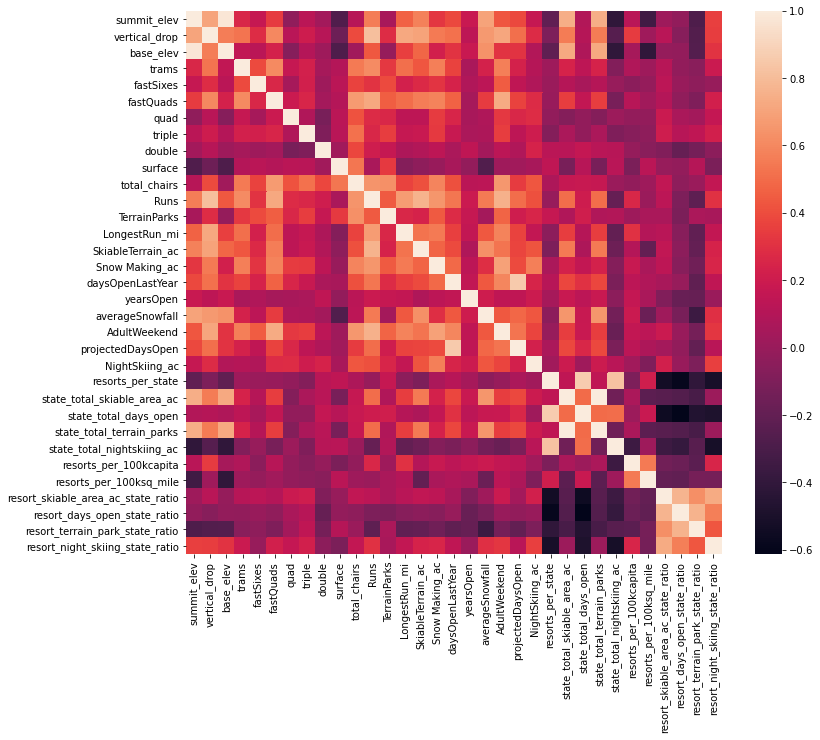

In [68]:
plt.subplots(figsize=(12,10))
sns.heatmap(ski_data.corr());

In [69]:
# Scatterplots of numeric features against ticket price
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'AdultWeekend', data=ski_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Ticket price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

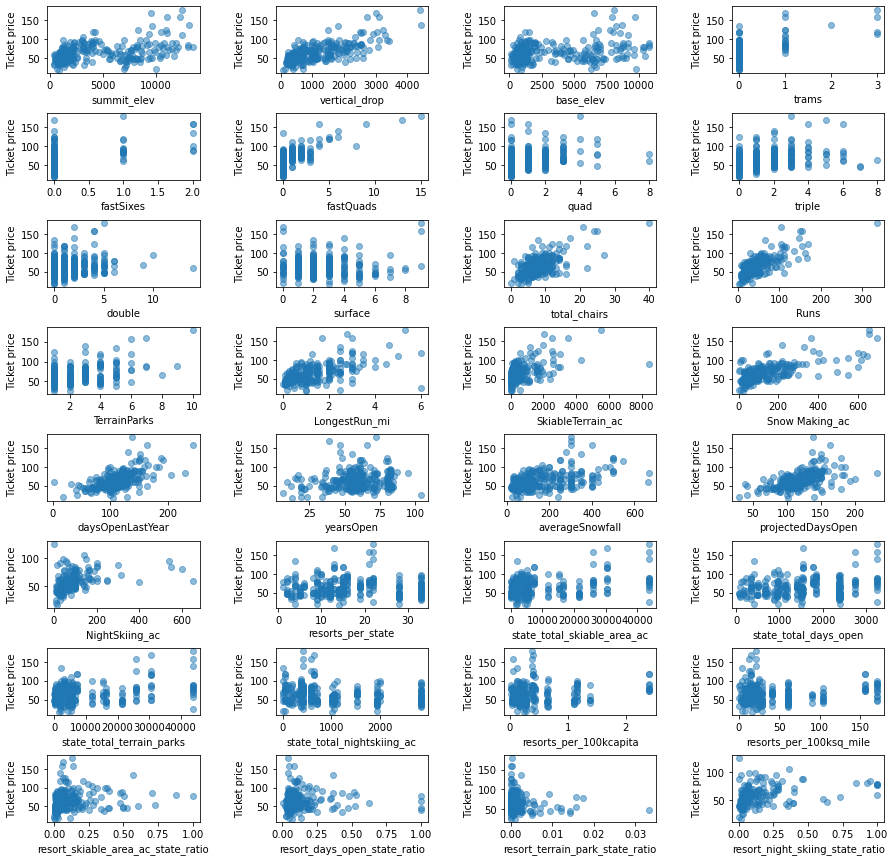

In [71]:
#Code task 13#
#Use a list comprehension to build a list of features from the columns of `ski_data` that
#are _not_ any of 'Name', 'Region', 'state', or 'AdultWeekend'
features = [ x for x in ski_data.columns if x not in ['Name', 'Region', 'state', 'AdultWeekend']]

scatterplots(features, ncol=4, figsize=(15, 15))



In [72]:
#further features that may be useful in that they relate to how easily a resort can transport people around.
#ratio of chairs to runs
ski_data['total_chairs_runs_ratio'] = ski_data.total_chairs / ski_data.Runs
ski_data['total_chairs_skiable_ratio'] = ski_data.total_chairs / ski_data.SkiableTerrain_ac
ski_data['fastQuads_runs_ratio'] = ski_data.fastQuads / ski_data.Runs
ski_data['fastQuads_skiable_ratio'] = ski_data.fastQuads / ski_data.SkiableTerrain_ac

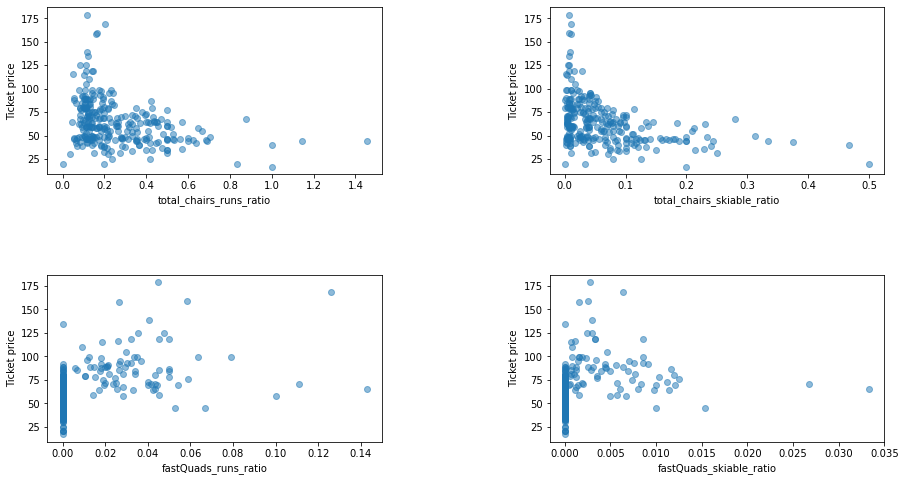

In [73]:
scatterplots(['total_chairs_runs_ratio', 'total_chairs_skiable_ratio', 
              'fastQuads_runs_ratio', 'fastQuads_skiable_ratio'], ncol=2)

In [ ]:
## Summary
## There appears to be some correlation worth pursuing in resorts per area and
#per population at the state level area. Also, there area a number of features that seem to have weight when 
#it comes to deciding ticket prices, including: total chairs, vertical drop, days open last year, etc.
#There are some clear contenders for features that are probably not relevant, like yearsOpen and base_elev 
#It would be great to have revenue per resort, or number of visitors at least, but it appears we may only get
#ticket price as proxy.
#There is a counterintuitive slope for both 'total_chairs_runs_ratio', 'total_chairs_skiable_ratio'

In [ ]:
ski_data.to_csv(r'C:\Users\Martin\Desktop\casa\)